# Intro to Hierachical Clustering using sklearn library

Step 1: Compute the proximity using a particular distance metric

Step 2: Each data point is assigned to a cluster

Step 3: Merge the clusters based one metric for the similaruty between clusters

Step 4: Update the distance matric

Step 5: Repeat Step 3 and Step 4 until only a single cluster remains


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn


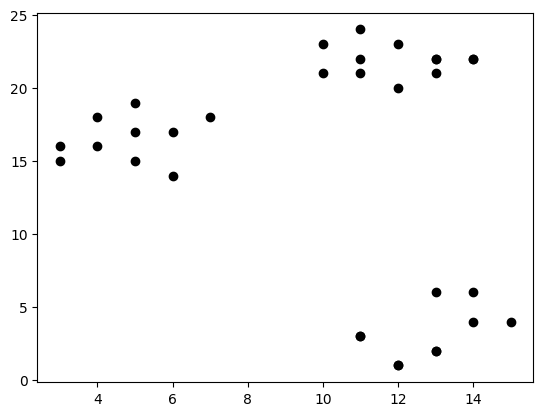

In [2]:
x = [ 5,  4, 13, 11, 13,  5,  3,  4,  3, 10, 12, 13, 14, 12, 11,  6,  7,  6,  5, 11, 14, 10, 12, 13, 14, 12, 11, 13, 11, 13, 14, 15]
y = [15, 18, 22, 21, 21, 19, 15, 16, 16, 21, 23, 22, 22, 20, 22, 17, 18, 14, 17, 24, 22, 23,  1,  2,  4,  1,  3,  6,  3,  2,  6,  4]

plt.scatter(x, y, color='black')
plt.show()

# Hierarchical Clustering - Agglomerative Clustering

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [5]:
data = list(zip(x,y))

# Min-linkage

Advantage - accuractely handle non-elliptical shapes

Disadvantage - it is sensitive to noise and outliers

In [6]:
Z1 = linkage(data, method='single', metric='euclidean')

# Max-Linkage

Advantage - less sensitive to noise and outliers in comparision to MIN method

Disadvantage - Max can break large clusters and tends to be biased towards globular clusters

In [7]:
Z2 = linkage(data, method='complete', metric='euclidean')

# Average-Linkage
The Average method defines the distance between clusters as the average pairwise distance

In [9]:
Z3 = linkage(data, method='average', metric='euclidean')

# Ward-Linkage

This method attempts to minimize the sum of the squared distances of the points from the clusters center

Compared to distances-based measures, the Ward method is less susceptible to noise and outliers

In [10]:
Z4 = linkage(data, method='ward', metric='euclidean')

# Centroid-Linkage

In [11]:
Z5 = linkage(data, method='centroid', metric='euclidean')

# Plots of these different Hierarchical Clusters

What is Dendrogram?

* A dendrogram is a branching diagram that shows the relationships between a group of entities. It's often used to represent clusters, which are categories or classes of similar members.

* The branches of the dendrogram represent these clusters, and the diagram implies an order or relationship between them.

* The height of the dendrogram indicates the order in which the clusters were joined

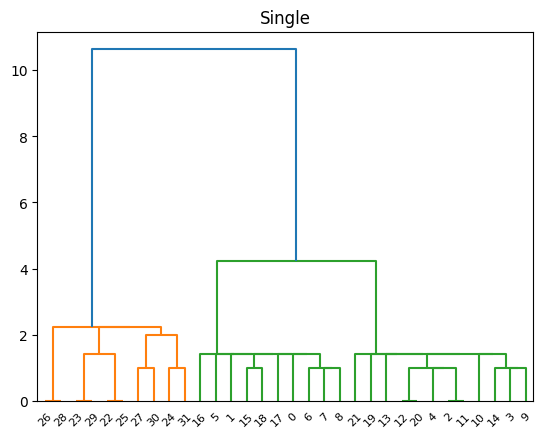

In [12]:
# Single linkage dendogram plot
plt.plot(2,2,1), dendrogram(Z1), plt.title('Single')
plt.show()

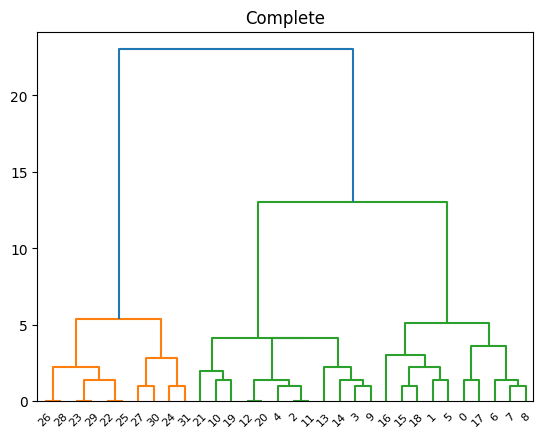

In [13]:
# Complete linkage dendogram plot
plt.plot(2,2,1), dendrogram(Z2), plt.title('Complete')
plt.show()

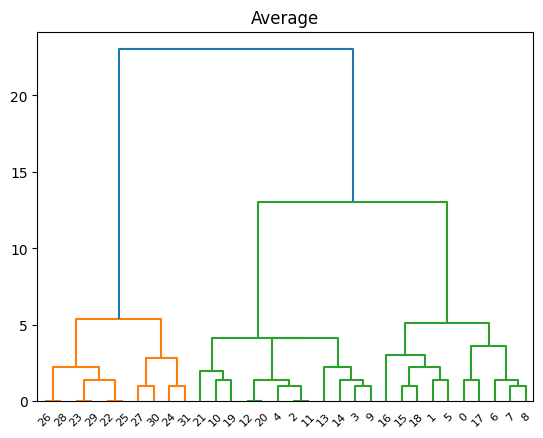

In [14]:
# Average linkage dendogram plot
plt.plot(2,2,1), dendrogram(Z2), plt.title('Average')
plt.show()

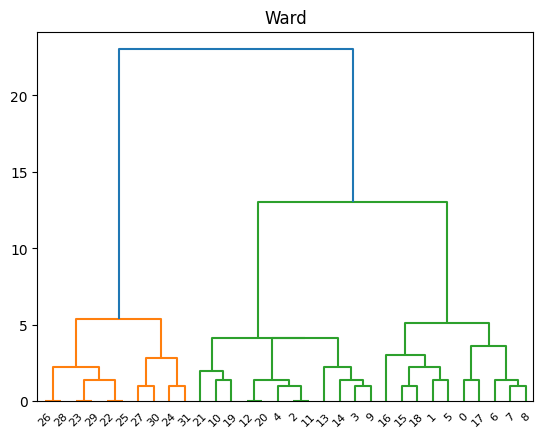

In [15]:
# Ward linkage dendogram plot
plt.plot(2,2,1), dendrogram(Z2), plt.title('Ward')
plt.show()

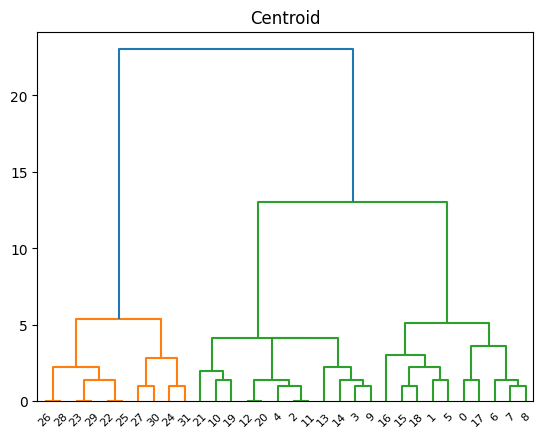

In [16]:
# Centroid linkage dendogram plot
plt.plot(2,2,1), dendrogram(Z2), plt.title('Centroid')
plt.show()

Post-Prunning to get Max number of clusters
> Form flat clusters from the hierarchical clustering defined by
the given linkage matrix.

In [17]:
from scipy.cluster.hierarchy import fcluster

c = fcluster(Z4, 3, criterion='maxclust')
c

array([3, 3, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

# Cluster Evaluation without Ground-Truth

In [18]:
from sklearn import metrics

**Sihlouette Coefficient**

Good score - closer to 1 or above 0.5

In [19]:
metrics.silhouette_score(data, c, metric='euclidean')

0.7508793049516054

**Calinski-Harabasz Index**

Good score - higher that value is the better dense and well separated clusters are

In [20]:
metrics.calinski_harabasz_score(data, c)

291.097772451713

**Davies-Bouldin Index**

Good-score = close to 0 => better partition


In [21]:
metrics.davies_bouldin_score(data, c)

0.3373474870417039

# Working with Real Dataset - wine.csv

In [23]:
from google.colab import files
files.upload()

Saving wine.csv to wine (1).csv


{'wine (1).csv': b'1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065\n1,13.2,1.78,2.14,11.2,100,2.65,2.76,.26,1.28,4.38,1.05,3.4,1050\n1,13.16,2.36,2.67,18.6,101,2.8,3.24,.3,2.81,5.68,1.03,3.17,1185\n1,14.37,1.95,2.5,16.8,113,3.85,3.49,.24,2.18,7.8,.86,3.45,1480\n1,13.24,2.59,2.87,21,118,2.8,2.69,.39,1.82,4.32,1.04,2.93,735\n1,14.2,1.76,2.45,15.2,112,3.27,3.39,.34,1.97,6.75,1.05,2.85,1450\n1,14.39,1.87,2.45,14.6,96,2.5,2.52,.3,1.98,5.25,1.02,3.58,1290\n1,14.06,2.15,2.61,17.6,121,2.6,2.51,.31,1.25,5.05,1.06,3.58,1295\n1,14.83,1.64,2.17,14,97,2.8,2.98,.29,1.98,5.2,1.08,2.85,1045\n1,13.86,1.35,2.27,16,98,2.98,3.15,.22,1.85,7.22,1.01,3.55,1045\n1,14.1,2.16,2.3,18,105,2.95,3.32,.22,2.38,5.75,1.25,3.17,1510\n1,14.12,1.48,2.32,16.8,95,2.2,2.43,.26,1.57,5,1.17,2.82,1280\n1,13.75,1.73,2.41,16,89,2.6,2.76,.29,1.81,5.6,1.15,2.9,1320\n1,14.75,1.73,2.39,11.4,91,3.1,3.69,.43,2.81,5.4,1.25,2.73,1150\n1,14.38,1.87,2.38,12,102,3.3,3.64,.29,2.96,7.5,1.2,3,1547\n1,13.63,1.81,2.7,17.2,112,2

In [24]:
cols = ['Class', 'Alcohol', 'MalicAcid', 'Ash', 'AlcalinityOfAsh', 'Magnesium', 'TotalPhenols',
         'Flavanoids', 'NonflavanoidPhenols', 'Proanthocyanins', 'ColorIntensity',
         'Hue', 'OD280/OD315', 'Proline']

df = pd.read_csv("/content/wine.csv", names=cols)
df.head()

,Class,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Out task is to predict a class by training a sklearn hierarchical cluster model with X data. X contains the features

['Alcohol',
 'MalicAcid',
 'Ash',
 'AlcalinityOfAsh',
 'Magnesium',
  'TotalPhenols',
  'Flavanoids',
  'NonflavanoidPhenols',
  'Proanthocyanins',
  'ColorIntensity',
  'Hue',
  OD280/OD315',
  'Proline']

In [25]:
# classes to predict are
print(f"No of unique class labels : {pd.unique(df['Class'])}")

No of unique class labels : [1 2 3]


In [28]:
y = df['Class']
y

,Class
0,1
1,1
2,1
3,1
4,1
...,...
173,3
174,3
175,3
176,3


In [29]:
y.shape

(178,)

In [34]:
X = df.loc[:, df.columns != 'Class']
X

,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# Predicting with scipy hierarchical clustering models

In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage

data = X

In [38]:
# Min-linkage
z1 = linkage(data, method='single', metric='euclidean')

#Max-linkage
z2 = linkage(data, method='complete', metric='euclidean')

#Average-linkage
z3 = linkage(data, method='complete', metric='euclidean')

#Ward-linkage
z4 = linkage(data, method='ward', metric='euclidean')

#Centroid-linkage
z5 = linkage(data, method='centroid', metric='euclidean')

# Plotting the dendogram of clusters

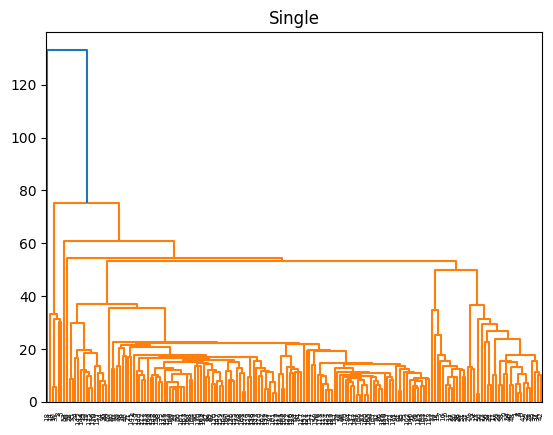

In [41]:
plt.plot(2,2,1)
dendrogram(z1)
plt.title('Single')
plt.show()

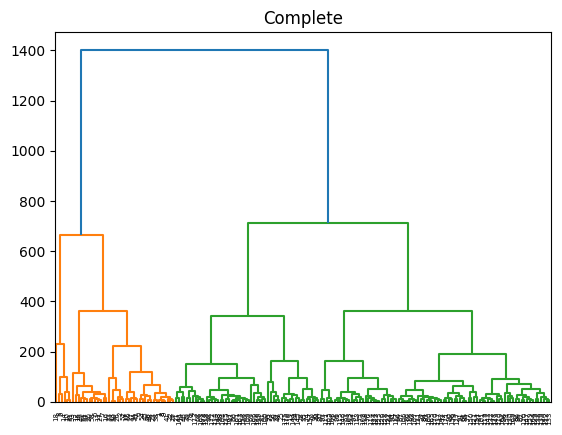

In [42]:
plt.plot(2,2,1)
dendrogram(z2)
plt.title('Complete')
plt.show()

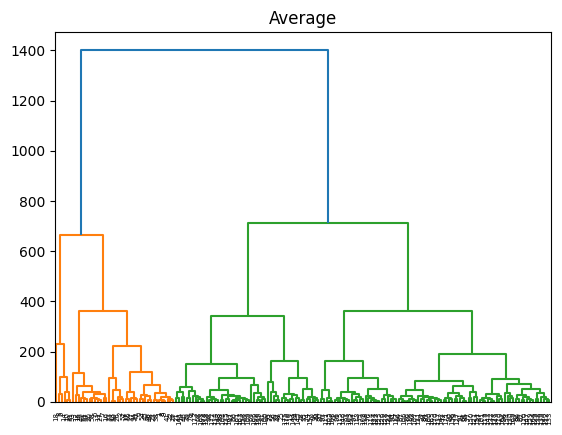

In [43]:
plt.plot(2,2,1)
dendrogram(z3)
plt.title('Average')
plt.show()

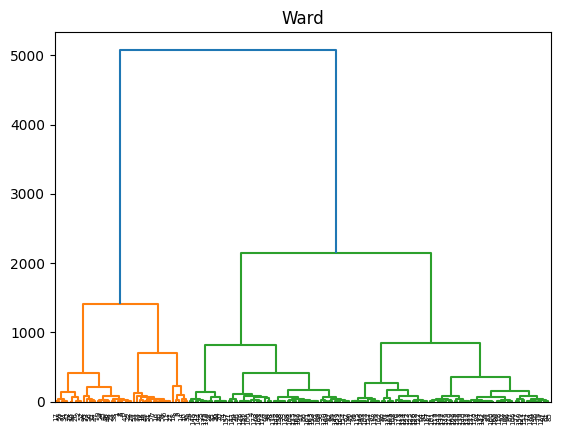

In [44]:
plt.plot(2,2,1)
dendrogram(z4)
plt.title('Ward')
plt.show()

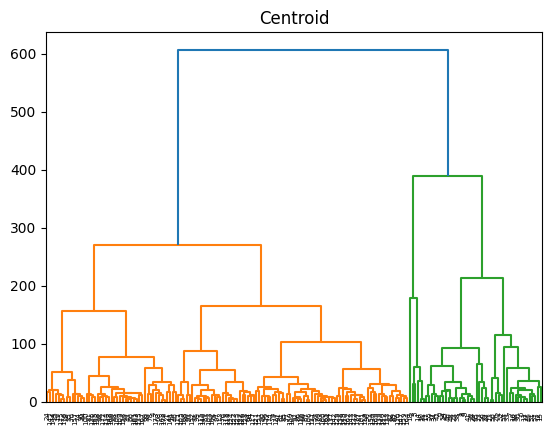

In [45]:
plt.plot(2,2,1)
dendrogram(z5)
plt.title('Centroid')
plt.show()

# Post-Pruning to get Max number of clusters


In [46]:
from scipy.cluster.hierarchy import fcluster

c = fcluster(z4, 3, criterion='maxclust')
c

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 2, 3, 3, 2,
       3, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3,
       2, 2, 3, 3, 3, 3, 3, 1, 2, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3,
       3, 3, 2, 2, 2, 3, 3, 3, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 3, 3, 3, 2,
       2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3], dtype=int32)

**Rand Index**


In [47]:
labels_true = y
labels_pred = c

In [48]:
metrics.rand_score(labels_true, labels_pred)

0.7171967244334413

**Mutual Information based scores**

In [49]:
metrics.adjusted_mutual_info_score(labels_true, labels_pred)

0.40986750565764346

**Homogeniety, scompleteness and V-measure**

In [50]:
metrics.homogeneity_score(labels_true, labels_pred)

0.4158606952333367

In [51]:
metrics.completeness_score(labels_true, labels_pred)

0.4162928371602123

In [52]:
metrics.v_measure_score(labels_true, labels_pred)

0.41607665398992943

**Fowlkes-Mallows-score**

In [53]:
metrics.fowlkes_mallows_score(labels_true, labels_pred)

0.5821221849687703